# Data Story: NBA Player Value Based on Win Shares and Salary

## Introduction:
#### Where should an organization put its money to generate the best chance at success? A question asked by businesses and professional sports teams alike; with the most accurate answer leading to favorable outcomes. I took a deeper dive into the NBA and analyzed players based on their productivity and their salary. Can we determine a player's true value to an organization in regards to specifically their on court production? What expectations do various salaries bring? Based upon production of a player, can we predict their value? 

#### This analysis aims to answer those questions and more to provide insights for organzitions to increase their rate of success.

## Sources of Data and Background Information

### The Data:
#### It's common for NBA fans to research stats and information regarding teams and players within the organization. The best part (and possibly least appreciated) is the fact that there is SO MUCH data publicly available. I (and many others) find themselves on [Basketball-Reference.com](https://www.basketball-reference.com) more frequent than others as it is a trusted and reliable source of statistical information for players and teams. For this analysis, I utilized NBA Advanced Player Statistics as well as their contract information. This data is available and kept up to date on a consistent basis. 

### More Info:
#### One caveat to my dataset is that is is only up to date through 4/6/2019. This means that it did not include all statistics through the entire regular season.

#### This analysis is largely relying on one particular data point for NBA Players, Win Shares (WS). This number is something that is calculated by Basketball-Reference and you can find more information regarding that by following [this link](https://www.basketball-reference.com/about/ws.html). In short, it is this: Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. 

#### Utilizing player statistics and contract information, we can determine a lot of information regarding a players value to an organization, in theory.

## Let's Begin:

#### Start with importing required packages for this analysis. Packages will be used for data wrangling, data visualization and statistical analysis.

In [405]:
#import required packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.core import datetools
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12, 8)

### Create Dataframe from csv
#### Last updated 4/7/2019, includes games through 4/6/2019


In [406]:
#creating player stats df from csv
df_stats = pd.read_csv('nba_player_stats-2.csv')

In [407]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


### There are headers throughout the table are in the csv for readability in the table. We are now removing those header rows for analysis purposes

In [408]:
df_stats = df_stats.drop(df_stats[(df_stats.Rk == 'Rk')].index)

In [409]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


### You can find a full definition of all column names at [NBA Advanced Stats](https://www.basketball-reference.com/leagues/NBA_2019_advanced.html)


In [410]:
list(df_stats)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

### Let's view how columns were imported
##### We need to see what kind of object or type the columns are.

In [411]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

### Now we must cast a column to Float from an Object
##### This is the quick and easy pandas way of doing it.

In [412]:
# ORB% is an object as noted above now check the coloumn out.
df_stats['ORB%'] = pd.to_numeric(df_stats['ORB%'], errors='coerce')

In [413]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
MP         object
PER        object
TS%        object
3PAr       object
FTr        object
ORB%      float64
DRB%       object
TRB%       object
AST%       object
STL%       object
BLK%       object
TOV%       object
USG%       object
OWS        object
DWS        object
WS         object
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
dtype: object

### Now we must convert all object to string object
##### We want to make sure we are working with the right type of strings here.

In [414]:
list_col = df_stats.columns

for col_name in list_col:
    df_stats[col_name] = df_stats[col_name].astype(str) # Cast from Object alone to String Object
    

In [415]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

## Now for the fun part. Convert numerical columns from objects to Numerical Objects.
##### Find the list of columns we want as strings, and convert those we want to numerical columns.

In [416]:
def converted_df(df_stats, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [417]:
list_col_names = df_stats.columns
col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

Columns to convert to Float: 
 ['USG%', 'VORP', 'DWS', 'TS%', 'DBPM', 'ORB%', 'WS', 'TRB%', 'FTr', 'Age', 'AST%', 'OWS', 'BPM', 'WS/48', '3PAr', 'OBPM', 'MP', 'DRB%', 'STL%', 'TOV%', 'PER', 'BLK%', 'G']


## Now convert the objects to Numerical objects.
##### This website may help to further understand the used cases of how to cast columns. [Pandas dtypes](https://pbpython.com/pandas_dtypes.html)

In [418]:
for col_name in col_name_to_convert:
    df_stats[col_name] = pd.to_numeric(df_stats[col_name], errors='coerce')

In [419]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [420]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


## As you can see, we cleaned up the dtypes of the stats dataset. Now we will do the same to the contract dataset.

In [421]:
df_contract = pd.read_csv('nba_player_contracts1.csv', index_col=False)
df_contract.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573


### You can find the full dataset of all contracts at [NBA Contracts](https://www.basketball-reference.com/contracts/players.html)

In [422]:
df_col_name = list(df_contract.iloc[0])
print(df_col_name)

['Rk', 'Player', 'Tm', 'year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'Signed Using', ' Guaranteed ']


### For ease of further recall, the year of each contract has been translated. See the translation below.

##### year0 = 2018-19 season
##### year1 = 2019-20 
##### year2 = 2020-21
##### year3 = 2021-22
##### year4 = 2022-23
##### year5 = 2023-24

### The guaranteed amount would be the value that is guaranteed in their contract. 

##### You can see we have to remove the first row as their were two header rows in a row.

In [423]:
df_contract.columns = df_col_name
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573


In [424]:
df_contract.drop(df_contract.head(1).index, inplace=True)
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
5,5,Blake Griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


### Now we must begin the merging of the two datasets into one dataframe. We're going to use the players names as a point of reference, so first we have to make them identical. To be certain, we're going to make all of the names lowercase.

In [425]:
df_contract['Player'] = df_contract['Player'].str.lower()

In [426]:
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,stephen curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,chris paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,russell westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,lebron james,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
5,5,blake griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


In [427]:
df_stats['Player'] = df_stats['Player'].str.lower()
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,alex abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,quincy acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,jaylen adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,steven adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,bam adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [428]:
df_full_data = pd.merge(df_stats, df_contract, on='Player', how='outer')

## Now it is merged!

In [429]:
df_full_data.head(10)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236,NaN,NaN,NaN,NaN,NaN,NaN,5455236
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949,NaN,NaN,NaN,NaN,NaN,NaN,213949
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854,1416852,NaN,NaN,NaN,NaN,NaN,236854
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304,25842697,27528090,NaN,NaN,NaN,1st Round Pick,77528091
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840,3454080,5115492,NaN,NaN,NaN,1st Round Pick,6409920
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015,26000000,24000000,NaN,NaN,NaN,Cap Space,55347015
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320,2429400,2545320,4054695,NaN,NaN,1st Round Pick,4503720


In [430]:
df_full_data.to_csv('nba_full_dataframe.csv', index=False)

### Check the datatypes of the columns and begin the process of converting to the correct file type

In [431]:
df = df_full_data

In [432]:
df.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
year0            object
year1            object
year2            object
year3            object
year4            object
year5            object
Signed Using     object
 Guaranteed      object
dtype: object

## Here we must convert dtypes for merged df, primarily the contract dataframe

In [433]:
def converted_df(df, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk_x', 'Player', 'Pos', 'Tm_x', 'Rk_y','Tm_y','Signed Using']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [434]:
list_col_names = df.columns
col_name_to_not_convert = ['Rk_x', 'Player', 'Pos', 'Tm_x', 'Rk_y','Tm_y','Signed Using']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP', 'year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'Guaranteed']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

Columns to convert to Float: 
 ['USG%', 'VORP', 'DWS', 'year3', 'DBPM', 'ORB%', 'TRB%', ' Guaranteed ', 'BPM', 'WS/48', 'OBPM', 'TOV%', 'TS%', 'year5', 'year2', 'WS', 'year4', 'year1', 'FTr', 'Age', 'AST%', 'OWS', '3PAr', 'MP', 'DRB%', 'STL%', 'PER', 'BLK%', 'year0', 'G']


In [435]:
for col_name in col_name_to_convert:
    df[col_name] = pd.to_numeric(df[col_name], errors = 'coerce')

### Let's check to make sure all looks good.

In [436]:
df.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
year0           float64
year1           float64
year2           float64
year3           float64
year4           float64
year5           float64
Signed Using     object
 Guaranteed     float64
dtype: object

### Let's explore the data further 

In [437]:
df.head(25)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015.0,26000000.0,24000000.0,NaN,NaN,NaN,Cap Space,55347015.0
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320.0,2429400.0,2545320.0,4054695.0,NaN,NaN,1st Round Pick,4503720.0


In [438]:
print(len(df))

919


In [439]:
print(df.isnull().sum())

Rk_x            110
Player           30
Pos             110
Age             110
Tm_x            110
G               110
MP              110
PER             110
TS%             119
3PAr            120
FTr             120
ORB%            110
DRB%            110
TRB%            110
AST%            110
STL%            110
BLK%            110
TOV%            119
USG%            110
OWS             110
DWS             110
WS              110
WS/48           110
OBPM            110
DBPM            110
BPM             110
VORP            110
Rk_y             87
Tm_y             88
year0           116
year1           554
year2           744
year3           840
year4           902
year5           919
Signed Using    424
 Guaranteed     121
dtype: int64


### We want to just analyze the data that we have both statistical and contract data for, so let's remove the null values from the "Age" column for now. 

In [440]:
# Let's remove the data that has missing values from 'Age' for now
df1 = df.dropna(subset = ['Age'])

In [441]:
print(df1.isnull().sum())

Rk_x              0
Player            0
Pos               0
Age               0
Tm_x              0
G                 0
MP                0
PER               0
TS%               9
3PAr             10
FTr              10
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              9
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0
BPM               0
VORP              0
Rk_y             58
Tm_y             58
year0            58
year1           466
year2           644
year3           735
year4           794
year5           809
Signed Using    349
 Guaranteed      63
dtype: int64


In [442]:
df1.head(25)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015.0,26000000.0,24000000.0,NaN,NaN,NaN,Cap Space,55347015.0
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320.0,2429400.0,2545320.0,4054695.0,NaN,NaN,1st Round Pick,4503720.0


In [443]:
# lets change the column names with percentages in them to not include the percent sign for future recall purposes
df1.rename(columns = {"3PAr" : "threePAr","TS%": "TSr", "ORB%": "ORBr", "DRB%" : "DRBr", "TRB%" : "TRBr", "AST%" : "ASTr", "STL%" : "STLr", "BLK%" : "BLKr", "TOV%" : "TOVr", "USG%" : "USGr"}, inplace = True)


D:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [444]:
df1.head()

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TSr,threePAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0


In [445]:
print(len(df1))

809


## Let's take a broad look at how the different features are correlated.

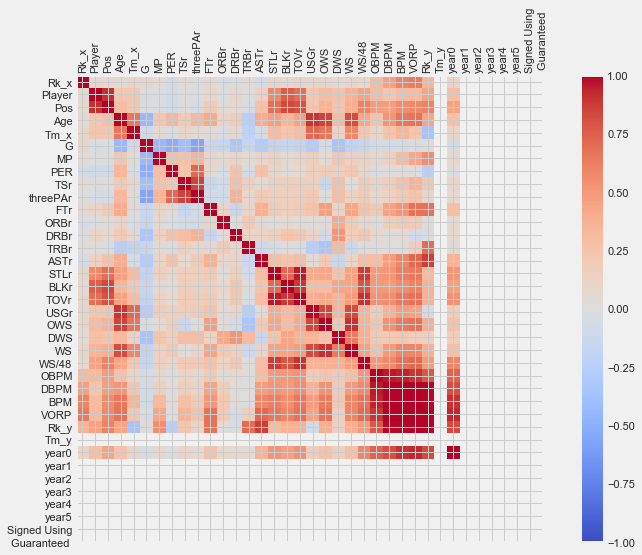

In [446]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap = 'coolwarm', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(df1.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

### This shows us a high level overview of the correlation between different features. The darker the red, the more positively correlated. The darker the blue, the more negatively correlated. The lighter the color, minimal or no correlation.

### For initial analysis, let's examine just those that have contributed to Win Share and have a contract in the 2018-19 season (year0)

In [447]:
df2 = df1.dropna(subset = ['year0', 'WS'])

In [448]:
print(len(df2))

751


### Let's take a quick glance at the distribution of Win Shares

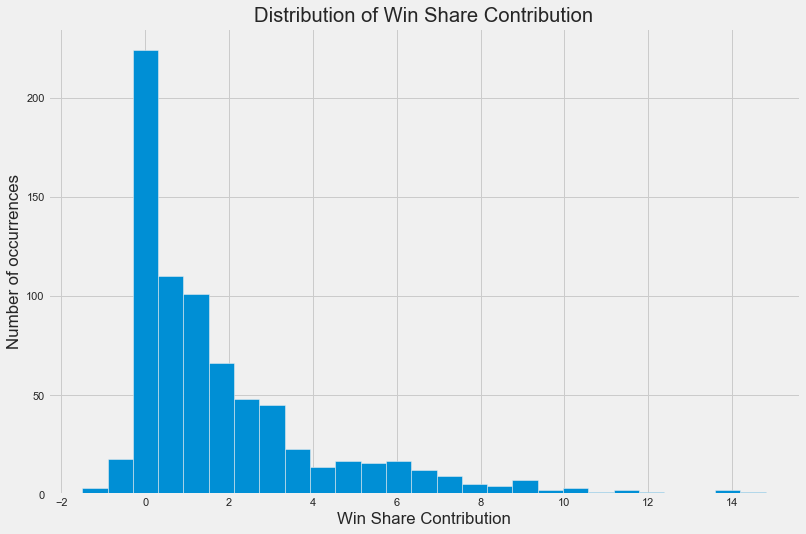

In [449]:
WS = df2['WS']

n_bins = np.sqrt(len(WS))

n_bins = int(n_bins)

_ = plt.figure(figsize = (12, 8))
_ = plt.hist(WS, bins = n_bins)
_ = plt.xlabel('Win Share Contribution')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Win Share Contribution')

plt.show()

### Quick glance at salary distribution for 2018-19 (year0) 

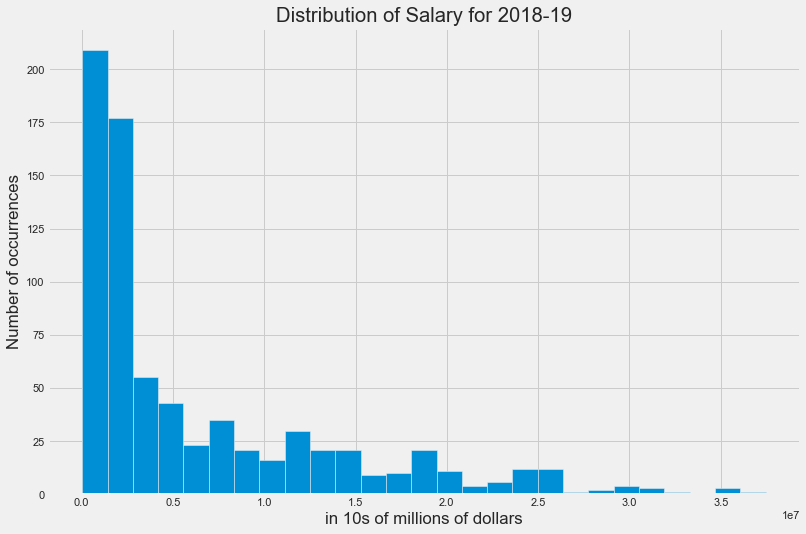

In [450]:
salary0 = df2['year0']
n_bins = np.sqrt(len(salary0))
n_bins = int(n_bins)

_ = plt.hist(salary0, bins = n_bins)
_ = plt.xlabel('in 10s of millions of dollars')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Salary for 2018-19')

plt.show()

### Because the distribution is not normal in the above contract histogram, let's aim to normalize it by taking the log of this information. What this does is help to not only normalize the data, but to show the incremental change instead of the absolute value change in contracts

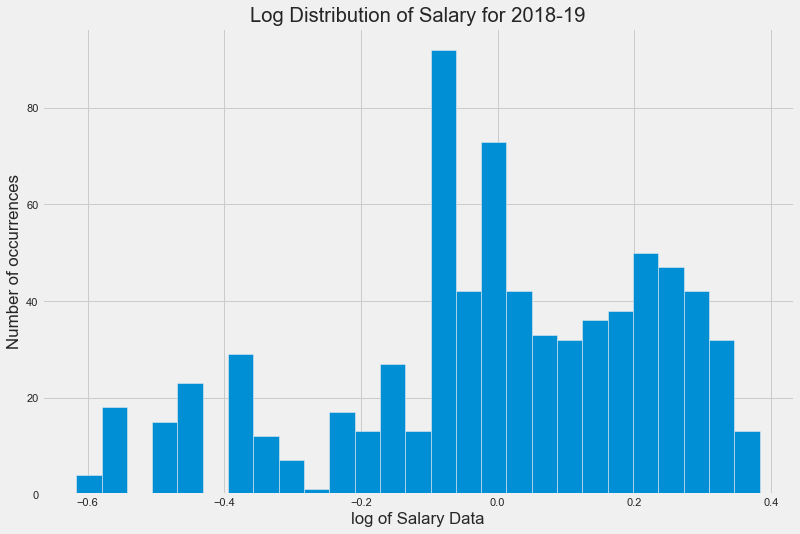

In [451]:
salary0 = np.log(df2['year0'])
max = np.max(salary0)
min = np.min(salary0)
mean = np.mean(salary0)
salary0 = (salary0 - mean) / (max - min)

n_bins = np.sqrt(len(salary0))
n_bins = int(n_bins)

_ = plt.hist(salary0, bins = n_bins)
_ = plt.xlabel('log of Salary Data')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Log Distribution of Salary for 2018-19')

plt.show()

### Let's take a closer look at the correlation between salary and Win Shares

In [452]:
array = np.array(df2[['year0', 'WS']])
print(array)

[[ 5.455236e+06  7.000000e-01]
 [ 2.139490e+05 -1.000000e-01]
 [ 2.368540e+05  1.000000e-01]
 ...
 [ 1.544951e+06  3.000000e+00]
 [ 1.544951e+06  1.800000e+00]
 [ 1.544951e+06  1.300000e+00]]


In [453]:
df_array = pd.DataFrame({'Salary':array[:,0],'WS':array[:,1]})
print(df_array)

         Salary    WS
0     5455236.0   0.7
1      213949.0  -0.1
2      236854.0   0.1
3    24157304.0   9.1
4     2955840.0   6.6
5    22347015.0   8.8
6     2074320.0  -0.1
7     2034120.0   7.5
8     6957105.0   5.6
9     2516048.0   0.3
10    8641000.0   2.7
11   20421546.0  -0.2
12   20421546.0  -0.2
13   20421546.0   0.0
14    1378242.0  -0.1
15   24157304.0  14.1
16   25534253.0   0.3
17    2393887.0   0.3
18    1952760.0   2.0
19    1349383.0   3.5
20   15000000.0   2.6
21   15000000.0   0.7
22   15000000.0   1.9
23    7250000.0   6.8
24    8165160.0   5.9
25    1378242.0   1.0
26    7305600.0   3.5
27    4544400.0  -0.1
28     170915.0  -0.1
29    4544400.0   0.0
..          ...   ...
721   1667160.0   3.4
722    264919.0   0.0
723  25434263.0   6.0
724  25467250.0   0.5
725    838464.0   1.0
726   8000000.0   5.3
727  14087500.0   3.8
728   1654440.0   1.1
729    122741.0   0.5
730     34183.0   0.5
731   2534280.0   1.5
732   3448926.0   2.6
733   1512601.0   0.8
734   1512

In [454]:
df_array.dtypes

Salary    float64
WS        float64
dtype: object

## Let's explore a scatter plot of WS to Salary

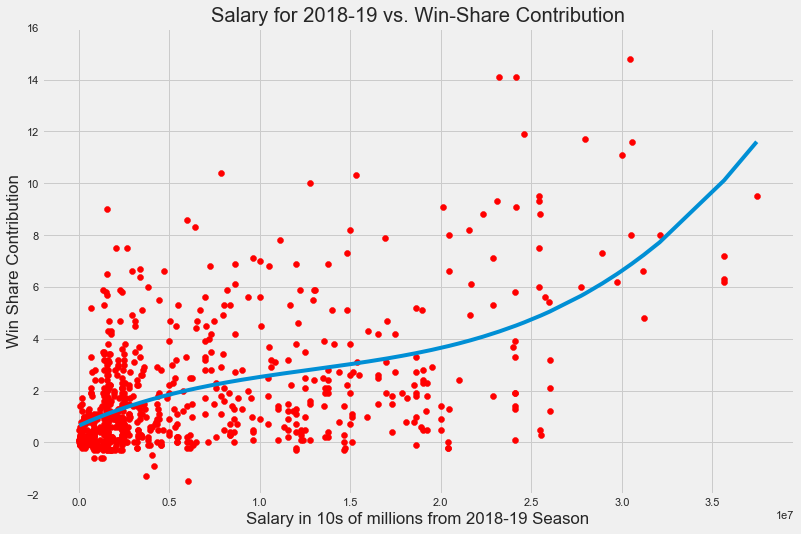

In [455]:
x = df_array.Salary
y = df_array.WS

_ = plt.title('Salary for 2018-19 vs. Win-Share Contribution')
_ = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)))
_ = plt.scatter(x = x, y = y, color = 'red')
_ = plt.xlabel('Salary in 10s of millions from 2018-19 Season')
_ = plt.ylabel('Win Share Contribution')
_ = plt.ylim([-2, 16])

plt.show()

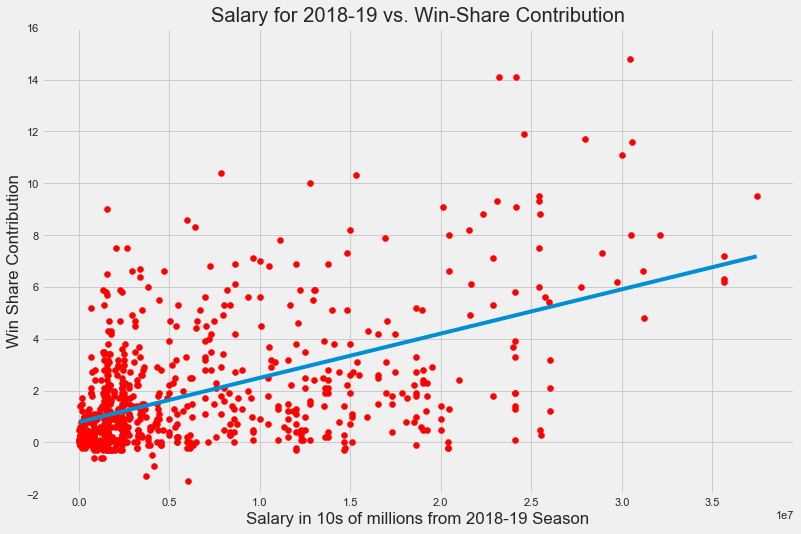

In [456]:
x = df_array.Salary
y = df_array.WS

_ = plt.title('Salary for 2018-19 vs. Win-Share Contribution')
_ = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
_ = plt.scatter(x = x, y = y, color = 'red')
_ = plt.xlabel('Salary in 10s of millions from 2018-19 Season')
_ = plt.ylabel('Win Share Contribution')
_ = plt.ylim([-2, 16])

plt.show()

### You can see that an exponential curve is a better fit of the data than a linear fit.

In [457]:
print('The linear correlation of salary to win share contribution for 2018-19 is: {}'.format(np.corrcoef(x, y)[0, 1]))

The linear correlation of salary to win share contribution for 2018-19 is: 0.5354315789872001


### A quick breakdown of the linear fit using Least Squares as our measurement of accuracy is below:

In [458]:
m = ols('Salary ~ WS',df_array).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     301.0
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.14e-57
Time:                        10:23:20   Log-Likelihood:                -12834.
No. Observations:                 751   AIC:                         2.567e+04
Df Residuals:                     749   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.253e+06   2.96e+05     10.989      0.0

### Let's get a better understanding of what 2018-19 salary and Win Share data actually look like 

In [459]:
df_array.describe()

,Salary,WS
count,7.510000e+02,751.000000
mean,6.408062e+06,1.879228
std,7.574114e+06,2.415427
min,3.418300e+04,-1.500000
25%,1.378242e+06,0.200000
50%,2.667600e+06,1.100000
75%,9.815625e+06,2.650000
max,3.745715e+07,14.800000


#### This tells us quite a bit of information in a small table. We can see the average salary is ~6.41 million USD and average WS is ~1.879.

#### There is also a range of ~34,200 to ~37.5 million in 2018-19 salary.
#### The range for WS is -1.5 to 14.8.

#### What this tells us is that the average NBA player in 2018-19 season averaged ~6.41 million USD and had a contribution of ~1.879 Win Shares.

#### One thing to note here is that 75% of the players earn less than 9.82 million in 2018-19. We can also see that 75% of the players contributed 2.65 Win Shares or less. These numbers are staggering and show just how few stars and superstars there are in the league. 

#### As shown in the scatter plot above, there are quite a few players who are contributing above the average Win Share of 1.879 and making less than the average salary of 6.41 million. We will explore further below.

In [460]:
#This sums the number of players that have a greater than average Win Share

sum(i > 1.879 for i in df_array.WS)

265

In [461]:
#This sums the number of players that have a greater than 2.65 Win Share

sum(i > 2.65 for i in df_array.WS)

188

In [462]:
#This sums the number of players that have a greater than average salary

sum(i > 6410000 for i in df_array.Salary)

250

In [463]:
#This sums the number of players that have a greater than 9.82 million USD salary

sum(i > 9820000 for i in df_array.Salary)

188

### Wrapping Things Up:

#### This initial analysis brought answers to quite a few questions that we had posed at the beginning. We were able to identify an exponential correlation between salary and Win Shares. We were also able to see the distribution among 2018-19 salary information and the Win Shares contribution. However, in looking closer those distributions, they were not of normal distribution. There was a tail for both plots with the majority of the data points coming from the early part of the distribution. 

#### Looking at the relationship between WS and Salary, it is clear that there is a positive linear correlation, but it is fairly weak. An exponential curve appears to be a better fit to the data. We can also see that the majority of players are below average when it comes to the average salary and average WS contribution in 2018-19. We can also see on the scatter plot, that there are some players that are really skewing the data as they are near the maximums. The log histogram plot of the salary information above helps to normalize and show the relative change in data vs the absolute change. 

#### This initial analysis opens up more questions that will be explored to help complete this analysis. Can we predict what a player's contribution to WS should be based upon salary? What about the reverse, can we predict a player's upcoming salary based upon their WS? How much of a player's salary is not determined by their on court influence? Is this measureable? 

#### As the analysis continues, I look forward to answering these questions and more.

## Inferential Statistics

#### As we look at this data and have a large majority of the contract data empty, it would make sense to utilize the relationship between Win Share Contribution and Salary to predict the future contracts of these players. As we predict the next salary, we must also take into consideration the players age, as this also has a factor in the salary amount and duration.

#### For the very beginning pieces of this analysis, lets look closer at the major values of our data on WS and Salary to decide if the mean is the best number to reprepent the data.

In [464]:
df_array.describe()

,Salary,WS
count,7.510000e+02,751.000000
mean,6.408062e+06,1.879228
std,7.574114e+06,2.415427
min,3.418300e+04,-1.500000
25%,1.378242e+06,0.200000
50%,2.667600e+06,1.100000
75%,9.815625e+06,2.650000
max,3.745715e+07,14.800000


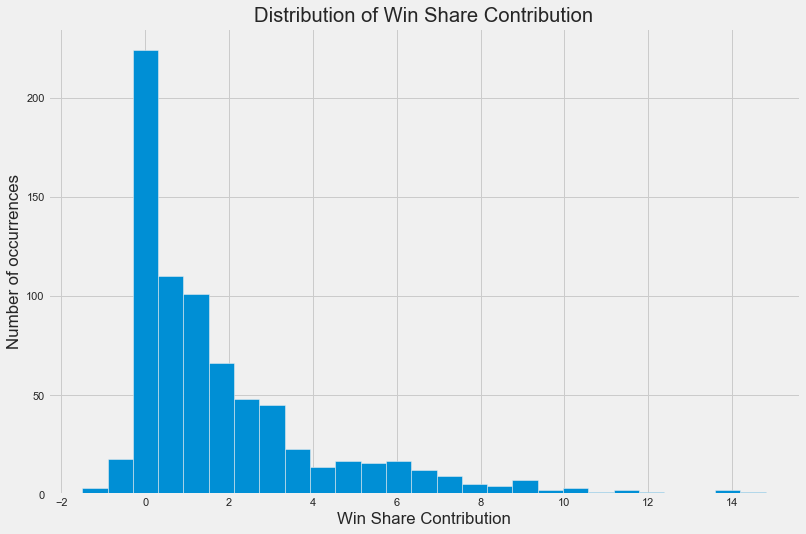

In [465]:
WS = df_array['WS']

n_bins = np.sqrt(len(WS))

n_bins = int(n_bins)

_ = plt.figure(figsize = (12, 8))
_ = plt.hist(WS, bins = n_bins)
_ = plt.xlabel('Win Share Contribution')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Win Share Contribution')

plt.show()

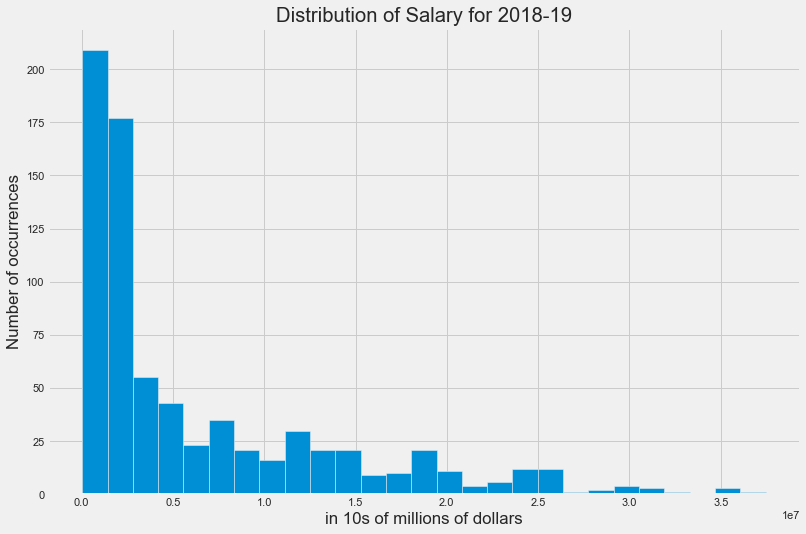

In [466]:
salary0 = df_array['Salary']
n_bins = np.sqrt(len(salary0))
n_bins = int(n_bins)

_ = plt.hist(salary0, bins = n_bins)
_ = plt.xlabel('in 10s of millions of dollars')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Salary for 2018-19')

plt.show()

### The mean of both the Salary and Win Shares does not seem to be the overall best representation of the data. Let's see what happens if we skim the top and bottom 10 percent of the data.

In [467]:
# Let's trim the Win Share data

tm_ws = df_array.WS

tm_ws = stats.trim_mean(tm_ws, .15)

print('The trimmed mean of Win Shares is: {}'.format(tm_ws))
print('The mean of Win Shares is: {}'.format(np.mean(df_array.WS)))

The trimmed mean of Win Shares is: 1.2916508538899432
The mean of Win Shares is: 1.879227696404793


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


In [468]:
# Let's trim the Salary data

tm_s0 = df_array.Salary

tm_s0 = stats.trim_mean(tm_s0, .15)

print('The trimmed mean of Salary for 2018-19 season is: {}'.format(tm_s0))
print('The mean of Salary for 2018-19 season is: {}'.format(np.mean(df_array.Salary)))

The trimmed mean of Salary for 2018-19 season is: 4526848.125237192
The mean of Salary for 2018-19 season is: 6408062.191744341


#### This shows a new representation with a 15% trimmed mean for both Win Shares and Salary. Both quite smaller than the original means.

#### Let's also take a closer look at the median for a representation of the data.

In [469]:
print('The median value of Win Shares is: {:.5}'.format(np.median(df_array.WS)))
print('The mean of Win Shares is: {}'.format(np.mean(df_array.WS)))

The median value of Win Shares is: 1.1
The mean of Win Shares is: 1.879227696404793


In [470]:
print('The median value of Salary for 2018-19 season is: {}'.format(np.median(df_array.Salary)))
print('The mean of Salary for 2018-19 season is: {}'.format(np.mean(df_array.Salary)))

The median value of Salary for 2018-19 season is: 2667600.0
The mean of Salary for 2018-19 season is: 6408062.191744341


### What's next? Let's test to see if there is a correlation between Win Shares and Salary.

In [471]:
df = df_array

### Hypothesis:

##### H0 : There is no correlation between Win Shares and Salary.
##### H1 : Salary is correlated to Win Shares.

In [472]:
# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
# Calculate Spearman's correlation

corr, p = spearmanr(df.WS, df.Salary)
print('Spearmans correlation: %.5f' % corr)

# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p = %.3f' % p)

Spearmans correlation: 0.51514
Samples are correlated (reject H0) p = 0.000


In [473]:
# Calculate Pearson's correlation
corr, p = pearsonr(df.WS, df.Salary)
print('Pearsons correlation: %.5f' % corr)

# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p= %.3f' % p)

Pearsons correlation: 0.53543
Samples are correlated (reject H0) p= 0.000


In [474]:
# Calculate Kendall's Correlation
corr, p = kendalltau(df.WS, df.Salary)
print('Kendall correlation coefficient: %.3f' % corr)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p= %.3f' % p)
else:
	print('Samples are correlated (reject H0) p= %.3f' % p)

Kendall correlation coefficient: 0.362
Samples are correlated (reject H0) p= 0.000


#### We can see that all three of these correlation tests show that there is a correlation between Win Shares and Salary as we rejected the null hypothesis on all three occasions.

### Wrapping up Inferential Statistics:
#### After initial analysis, we can see that using ONLY the Win Shares as a feature for prediction yields a low accuracy. A strong positive that came from this was statistically proving that there is a correlation between Win Shares and Salary. One thing to note that was extremely important is determining what value to use to represent the average of the data.

#### Initially, I used the mean, but this value was likely skewed because of the distribution we saw earlier. From there, I trimmed the data and removed the top and bottom 15% to analyze that new average value. The trimmed mean was reduced significantly, which was expected. The median is the value I chose to represent an average data point for both WS and Salary moving forward.

#### Once this was completed, I tested for correlation between WS and Salary using a variety of tests. In each case, we rejected the null hypothesis and can say with confidence that there is a correlation between WS and Salary. To be even more accurate, there is a positive correlation, and Pearson's test of correlation, a .53543 correlation between WS and 2018-19 Salary.

#### The goal moving forward is to utilize the data and Win Shares stat to predict the future salaries of NBA players.

In [475]:
df2 = df_array

In [547]:
# Create arrays for features and target variable
y = df2['Salary'].values
X_WS = df2['WS'].values

# Reshape X and y
y = y.reshape(-1, 1)
X_WS = X_WS.reshape(-1, 1)

In [548]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_WS, y, test_size = 0.3, random_state = 42)

# Create the regressor: reg
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.17926516492210276
Root Mean Squared Error: 6663598.413486741


In [549]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X_WS, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X_WS, y, cv = 10)
print(np.mean(cvscores_10))

0.23026537866353633
0.1771076738712834


In [552]:
m = ols('Salary ~ WS', df2).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     301.0
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.14e-57
Time:                        11:23:25   Log-Likelihood:                -12834.
No. Observations:                 751   AIC:                         2.567e+04
Df Residuals:                     749   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.253e+06   2.96e+05     10.989      0.0

#### What we can see here is that using only the Win Shares as a feature for prediction yields very minimal results. What if we took a look at all the possible features that were correlated to the year0 ? 

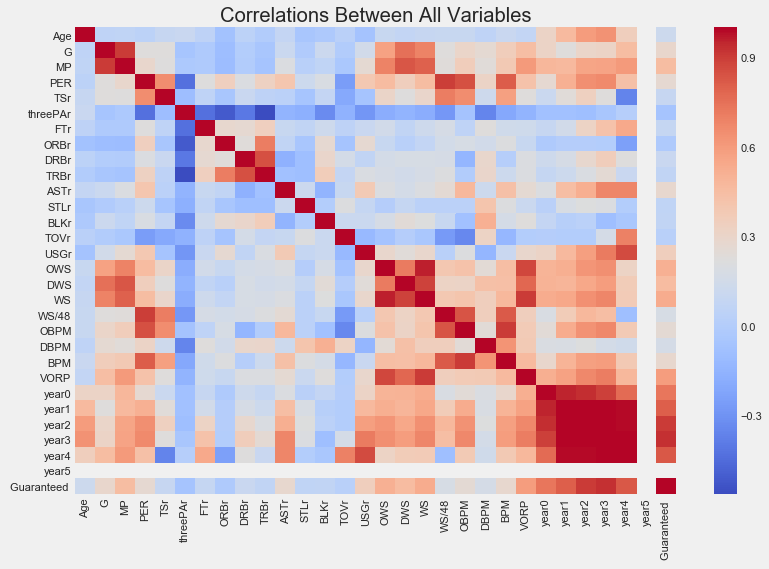

In [479]:
#### Lets take another look at the correlations to year0 to begin to build our model using the best features.

corr = df1.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'coolwarm')
_ = plt.title('Correlations Between All Variables')

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


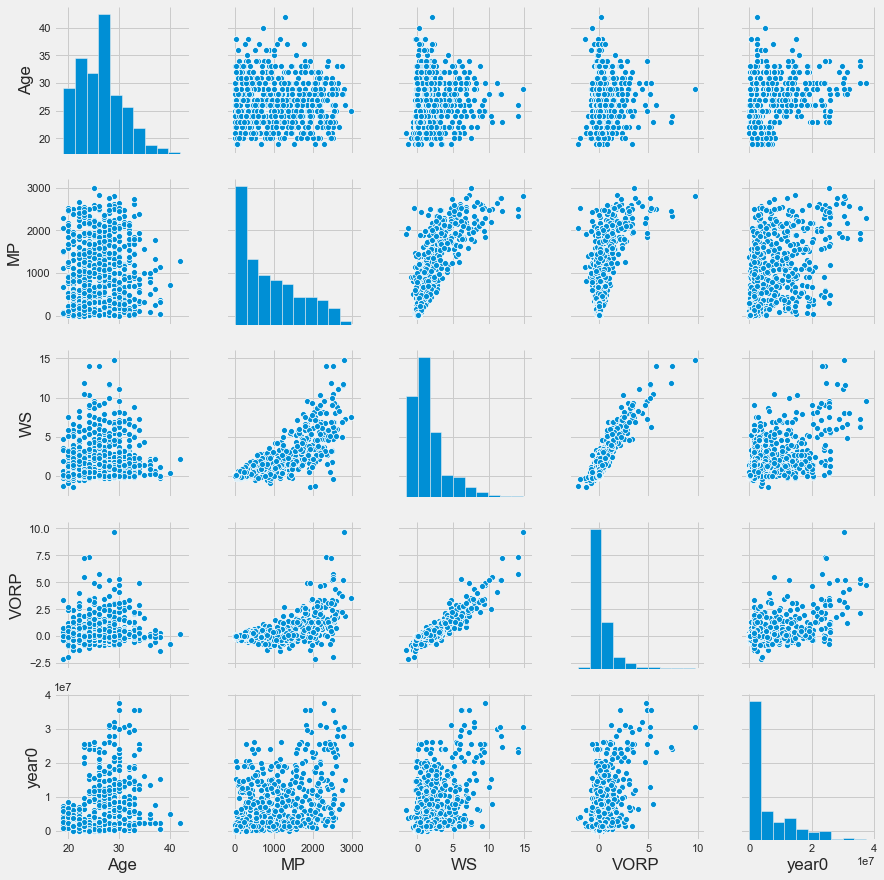

In [480]:
sns.pairplot(df1, vars=['Age', 'MP', 'WS', 'VORP', 'year0'])
plt.show();

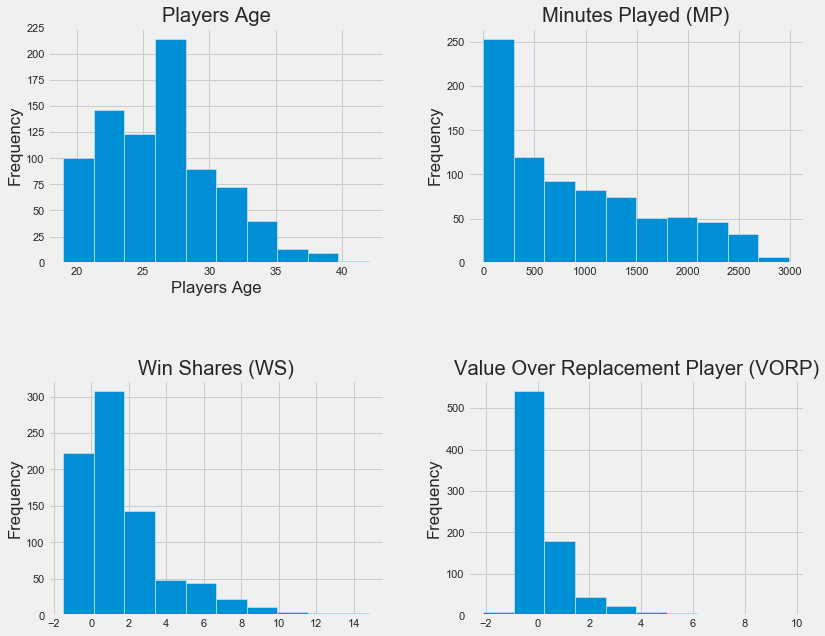

In [481]:
plt.subplots(2,2, figsize = (15,12))

plt.subplot(221)
plt.hist(df1.Age)
plt.title('Players Age')
plt.xlabel('Players Age')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(df1.MP)
plt.title('Minutes Played (MP)')
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(df1.WS)
plt.title('Win Shares (WS)')
plt.ylabel('Frequency')

plt.subplot(224)
plt.hist(df1.VORP)
plt.title('Value Over Replacement Player (VORP)')
plt.ylabel('Frequency')

plt.subplots_adjust(left = 0.25, wspace = 0.25, hspace = 0.5, top = 0.75)
plt.show();

In [482]:
df1.head()

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TSr,threePAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0


In [483]:
# Lets prepare the dataset for initial setup analysis by removing columns that are not quantified.

df = df1[['Age','G','MP','PER','TSr','threePAr','FTr','ORBr','DRBr','TRBr','ASTr','STLr','BLKr','TOVr','USGr','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP','year0']].copy()

In [484]:
# At this point, after a closer look at the data, we are going to fill the null values of the data with the median of each column.
# This value appears to be the best represenation of the data.

print(df.isnull().sum())

Age          0
G            0
MP           0
PER          0
TSr          9
threePAr    10
FTr         10
ORBr         0
DRBr         0
TRBr         0
ASTr         0
STLr         0
BLKr         0
TOVr         9
USGr         0
OWS          0
DWS          0
WS           0
WS/48        0
OBPM         0
DBPM         0
BPM          0
VORP         0
year0       58
dtype: int64


In [485]:
df = df.fillna(df.median())

In [486]:
print(df.isnull().sum())

Age         0
G           0
MP          0
PER         0
TSr         0
threePAr    0
FTr         0
ORBr        0
DRBr        0
TRBr        0
ASTr        0
STLr        0
BLKr        0
TOVr        0
USGr        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
year0       0
dtype: int64


#### Hypothesis:

##### H0 : There is no correlation between a player's on court performance and Salary.
##### H1 : Salary is correlated to a player's on court performance.

In [487]:
X = df.drop('year0', axis = 1)
y = df.year0

In [488]:
# Use all predictors to fit linear model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [489]:
lm.fit(X, df.year0)
print(lm.coef_)
print(lm.intercept_)

[ 5.19981014e+05 -1.40523223e+05  5.53836818e+03  1.99456321e+05
 -5.62602009e+06 -2.56997329e+06  8.92210102e+05 -3.25421453e+05
 -9.58494711e+04  2.85983658e+05 -9.66700056e+04 -5.80868240e+05
 -4.63611870e+04  9.35519847e+04  9.91853804e+04  1.21676786e+06
  2.43828090e+06 -1.09057172e+06 -1.85443248e+07  1.18852108e+07
  1.15535606e+07 -1.14632223e+07  9.67457429e+05]
-5753064.747230366


In [490]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Age,5.199810e+05
1,G,-1.405232e+05
2,MP,5.538368e+03
3,PER,1.994563e+05
4,TSr,-5.626020e+06
5,threePAr,-2.569973e+06
6,FTr,8.922101e+05
7,ORBr,-3.254215e+05
8,DRBr,-9.584947e+04
9,TRBr,2.859837e+05


In [491]:
# first five predicted salaries
lm.predict(X)[0:5]

array([  777870.92010054,  4600042.82494755,  -684606.09972725,
       17016381.79033425,  9811326.39037355])

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


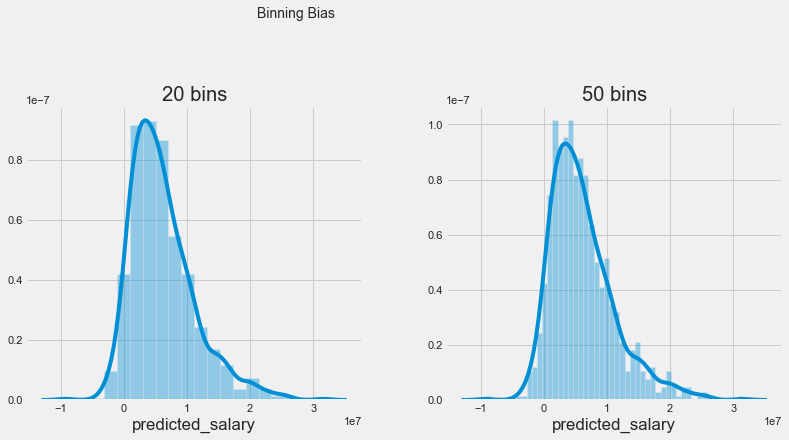

In [492]:
df['predicted_salary'] = lm.predict(X)

plt.subplots(1, 2, figsize = (15, 6))

plt.subplot(121)
sns.distplot(df['predicted_salary'], bins = 20)
_ = plt.title('20 bins')

plt.subplot(122)
sns.distplot(df['predicted_salary'], bins = 50)
_ = plt.title('50 bins')

plt.suptitle('Binning Bias', fontsize = 14)

plt.subplots_adjust(left = 0.25, wspace = 0.25, top = 0.75)
plt.show();

In [493]:
pred = df.predicted_salary

pred.describe()

count    8.090000e+02
mean     6.139896e+06
std      5.112781e+06
min     -9.254046e+06
25%      2.479468e+06
50%      5.191936e+06
75%      8.613414e+06
max      3.153940e+07
Name: predicted_salary, dtype: float64

In [494]:
m = ols('year0 ~ predicted_salary', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  year0   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     752.3
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          1.52e-117
Time:                        10:23:24   Log-Likelihood:                -13673.
No. Observations:                 809   AIC:                         2.735e+04
Df Residuals:                     807   BIC:                         2.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.148e-08   2.91e+05  

In [495]:
# Original model using only WS as variable. 

m = ols('Salary ~ WS',df_array).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     301.0
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.14e-57
Time:                        10:23:24   Log-Likelihood:                -12834.
No. Observations:                 751   AIC:                         2.567e+04
Df Residuals:                     749   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.253e+06   2.96e+05     10.989      0.0

### Analysis:

##### In comparison, this model is much more accurate than the original that included just Win Shares as a predictor. The R2 value increased from .287 to .482 and the F-stat increased from 301.0 to 752.3. This shows we are accounting for a greater portion of the variability in 2018-19 salary and that there is a relationship between the predictors and the response. 

In [496]:
# Calculate Pearson's R for each feature:

corr = df.corr()
corr.iloc[[-1]]

,Age,G,MP,PER,TSr,threePAr,FTr,ORBr,DRBr,TRBr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year0,predicted_salary
predicted_salary,0.470915,0.481755,0.711807,0.375589,0.173704,-0.104985,0.12114,-0.030045,0.182756,0.119145,...,0.725452,0.738107,0.785332,0.26343,0.354108,0.27646,0.402661,0.757198,0.694595,1.0


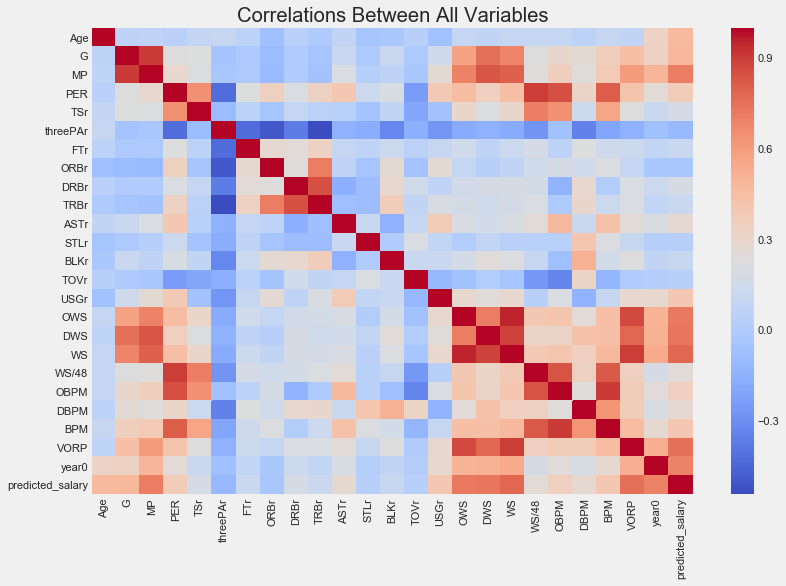

In [497]:
#### Lets take another look at the correlations to year0 to begin to build our model using the best features.

corr = df.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'coolwarm')
_ = plt.title('Correlations Between All Variables')

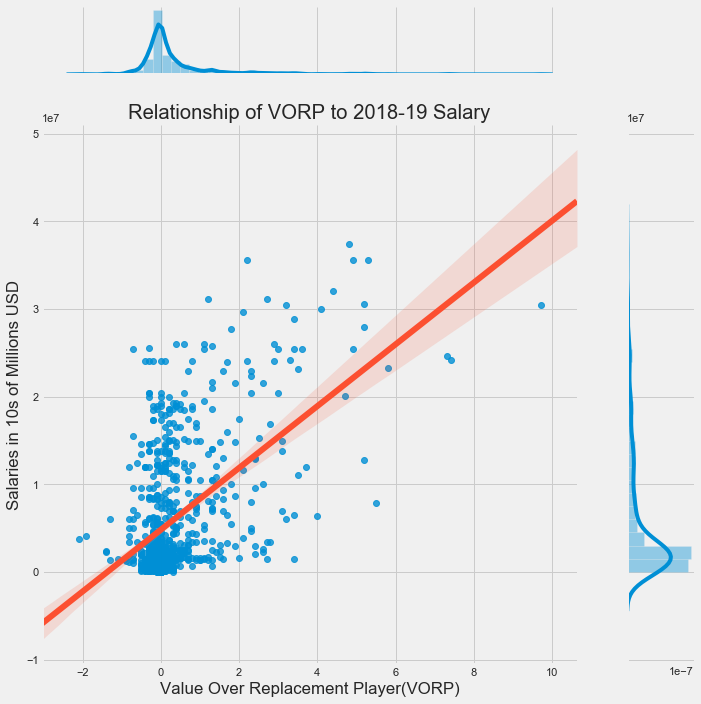

In [498]:
# Creating plots for most influential features
# Value Over Replacement Player

sns.jointplot('VORP', 'year0', data = df, kind = 'reg', space = .75, height = 10, line_kws = {'color' : 'C1'})
_ = plt.xlabel('Value Over Replacement Player(VORP)')
_ = plt.ylabel('Salaries in 10s of Millions USD')
_ = plt.title('Relationship of VORP to 2018-19 Salary')

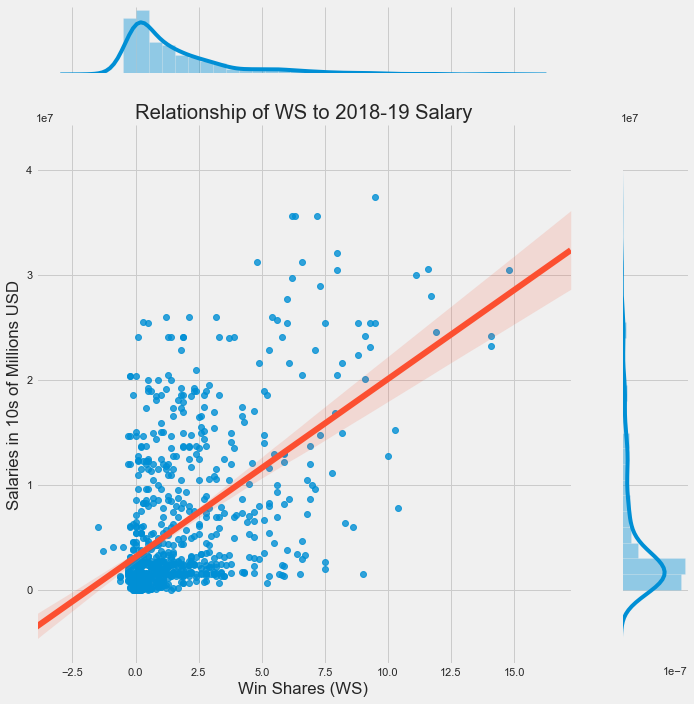

In [499]:
# Win Shares

sns.jointplot('WS', 'year0', data = df, kind = 'reg', space = .75, height = 10, line_kws = {'color' : 'C1'})
_ = plt.xlabel('Win Shares (WS)')
_ = plt.ylabel('Salaries in 10s of Millions USD')
_ = plt.title('Relationship of WS to 2018-19 Salary')

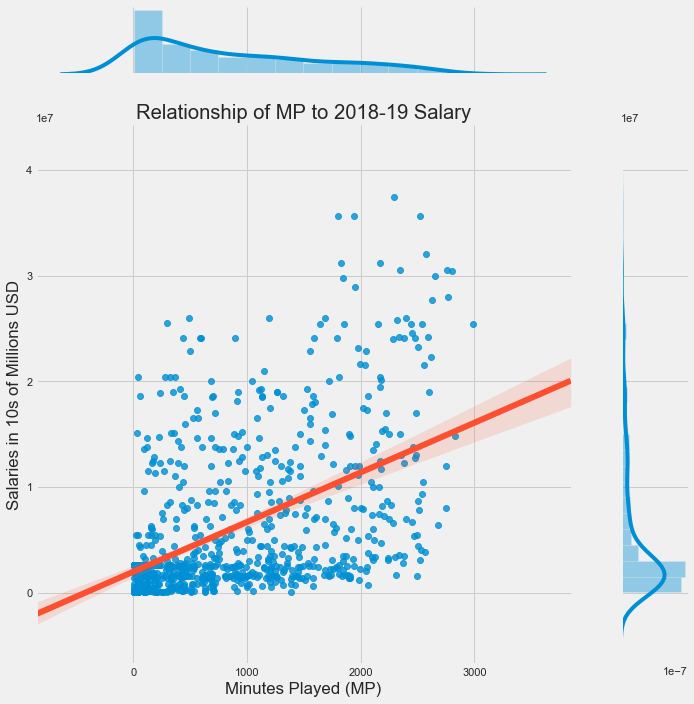

In [500]:
# Minutes Played 

sns.jointplot('MP', 'year0', data = df, kind = 'reg', space = .75, height = 10, line_kws = {'color' : 'C1'})
_ = plt.xlabel('Minutes Played (MP)')
_ = plt.ylabel('Salaries in 10s of Millions USD')
_ = plt.title('Relationship of MP to 2018-19 Salary')

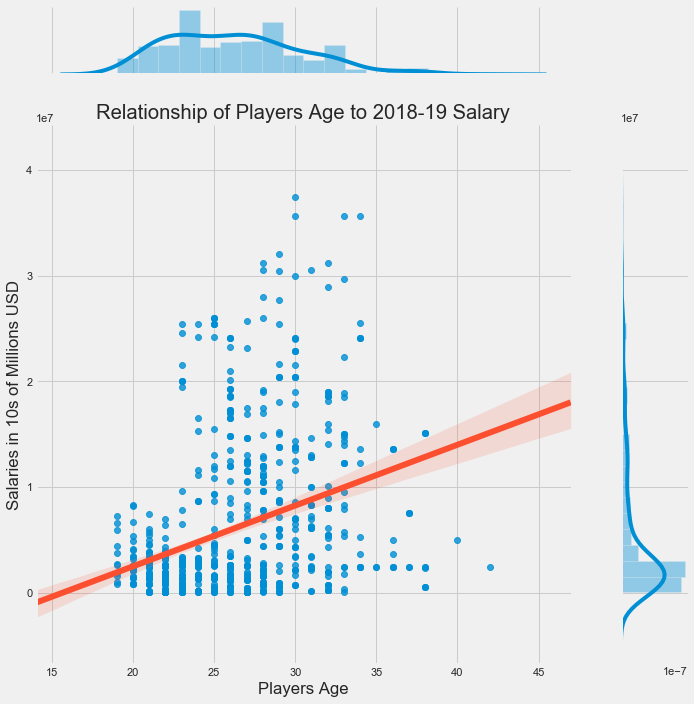

In [501]:
# Minutes Played 

sns.jointplot('Age', 'year0', data = df, kind = 'reg', space = .75, height = 10, line_kws = {'color' : 'C1'})
_ = plt.xlabel('Players Age')
_ = plt.ylabel('Salaries in 10s of Millions USD')
_ = plt.title('Relationship of Players Age to 2018-19 Salary')

In [502]:
# One model that includes all features

m_all = ols('year0 ~ Age + G + MP + PER + TSr + threePAr + FTr + ORBr + DRBr + TRBr + ASTr + STLr + BLKr + TOVr + USGr + OWS + DWS + WS + OBPM + DBPM + BPM + VORP', df).fit()
m_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  year0   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     32.92
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.32e-96
Time:                        10:23:27   Log-Likelihood:                -13675.
No. Observations:                 809   AIC:                         2.740e+04
Df Residuals:                     786   BIC:                         2.750e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.847e+06   3.05e+06     -2.242      0.025   -1.28e+07   -8.53e+05
Age         5.131e+05   4.75e+04     10.811      0.000     4.2e+05    6.06e+05
G          -1.491e+05   2.06e+04     -7.246      0.000   -1.89e+05   -1.09e+05
MP          6084.7793    840.788      7.237      0.000    4434.323    7735.236
PER        -1.336e+05   1.37e+05     -0.973      0.331   -4.03e+05    1.36e+05
TSr        -3.664e+06   2.99e+06     -1.225      0.221   -9.53e+06    2.21e+06
threePAr   -2.663e+06   1.75e+06     -1.518      0.130   -6.11e+06    7.82e+05
FTr          5.72e+05   1.09e+06      0.524      0.601   -1.57e+06    2.72e+06
ORBr        3.986e+04   6.11e+05      0.065      0.948   -1.16e+06    1.24e+06
DRBr        2.119e+05   5.88e+05      0.360      0.719   -9.43e+05    1.37e+06
TRBr       -3.293e+05    1.2e+06     -0.275      0.783   -2.68e+06    2.02e+06
ASTr       -7.628e+04   3.12e+04     -2.446      0.015   -1.37e+05   -1.51e+04
STLr       -4.103e+05   2.85e+05     -1.442      0.150   -9.69e+05    1.48e+05
BLKr        3.258e+04   2.27e+05      0.143      0.886   -4.13e+05    4.78e+05
TOVr        9.405e+04   4.53e+04      2.076      0.038    5122.663    1.83e+05
USGr        2.273e+05   5.27e+04      4.312      0.000    1.24e+05    3.31e+05
OWS         1.577e+06   4.04e+06      0.391      0.696   -6.35e+06     9.5e+06
DWS         2.507e+06   4.04e+06      0.621      0.535   -5.42e+06    1.04e+07
WS         -1.444e+06   4.04e+06     -0.358      0.721   -9.37e+06    6.48e+06
OBPM        1.144e+07   3.72e+06      3.072      0.002    4.13e+06    1.88e+07
DBPM        1.115e+07   3.74e+06      2.980      0.003     3.8e+06    1.85e+07
BPM        -1.105e+07   3.73e+06     -2.965      0.003   -1.84e+07   -3.73e+06
VORP        9.731e+05   5.49e+05      1.772      0.077   -1.05e+05    2.05e+06
==============================================================================
Omnibus:                       77.231   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.383
Skew:                           0.726   Prob(JB):                     4.81e-24
Kurtosis:                       4.037   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [503]:
# Selected features with lowest p-values. 

m_sel = ols('year0 ~ Age + G + MP + ASTr + TOVr + USGr + OBPM + DBPM + BPM + VORP', df).fit()
m_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  year0   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     70.13
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          2.77e-102
Time:                        10:23:27   Log-Likelihood:                -13684.
No. Observations:                 809   AIC:                         2.739e+04
Df Residuals:                     798   BIC:                         2.744e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   1.52e+06     -8.124      0.000   -1.53e+07   -9.37e+06
Age         5.304e+05   4.61e+04     11.506      0.000     4.4e+05    6.21e+05
G          -1.392e+05   1.93e+04     -7.227      0.000   -1.77e+05   -1.01e+05
MP          6987.2976    721.076      9.690      0.000    5571.868    8402.727
ASTr       -4.987e+04   2.67e+04     -1.867      0.062   -1.02e+05    2564.291
TOVr        6.366e+04   4.14e+04      1.538      0.124   -1.76e+04    1.45e+05
USGr        1.845e+05   3.87e+04      4.770      0.000    1.09e+05     2.6e+05
OBPM        1.156e+07   3.68e+06      3.140      0.002    4.34e+06    1.88e+07
DBPM        1.169e+07   3.67e+06      3.182      0.002    4.48e+06    1.89e+07
BPM        -1.153e+07   3.68e+06     -3.136      0.002   -1.88e+07   -4.31e+06
VORP        1.478e+06   2.52e+05      5.858      0.000    9.83e+05    1.97e+06
==============================================================================
Omnibus:                       76.559   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.376
Skew:                           0.732   Prob(JB):                     2.16e-23
Kurtosis:                       3.976   Cond. No.                     3.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [504]:
# Chose features with lowest p-values from previous model.

m_1 = ols('year0 ~ Age + G + MP + USGr + OBPM + DBPM + BPM + VORP', df).fit()
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  year0   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     86.85
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          2.74e-103
Time:                        10:23:27   Log-Likelihood:                -13686.
No. Observations:                 809   AIC:                         2.739e+04
Df Residuals:                     800   BIC:                         2.743e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.196e+07   1.48e+06     -8.071      0.000   -1.49e+07   -9.05e+06
Age         5.287e+05    4.6e+04     11.493      0.000    4.38e+05    6.19e+05
G          -1.357e+05   1.92e+04     -7.074      0.000   -1.73e+05   -9.81e+04
MP          6921.4995    720.673      9.604      0.000    5506.866    8336.133
USGr         1.63e+05   3.66e+04      4.451      0.000    9.11e+04    2.35e+05
OBPM        1.075e+07   3.66e+06      2.935      0.003    3.56e+06    1.79e+07
DBPM        1.101e+07   3.66e+06      3.005      0.003    3.82e+06    1.82e+07
BPM         -1.08e+07   3.66e+06     -2.948      0.003    -1.8e+07   -3.61e+06
VORP        1.472e+06   2.53e+05      5.829      0.000    9.76e+05    1.97e+06
==============================================================================
Omnibus:                       78.468   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.339
Skew:                           0.745   Prob(JB):                     4.92e-24
Kurtosis:                       3.982   Cond. No.                     3.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [505]:
m_2 = ols('year0 ~ Age + MP + VORP + WS', df).fit()
m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  year0   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           2.11e-89
Time:                        10:23:27   Log-Likelihood:                -13728.
No. Observations:                 809   AIC:                         2.747e+04
Df Residuals:                     804   BIC:                         2.749e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.014e+07   1.29e+06     -7.853      0.000   -1.27e+07   -7.61e+06
Age         5.017e+05   4.81e+04     10.439      0.000    4.07e+05    5.96e+05
MP          2812.3681    487.822      5.765      0.000    1854.813    3769.924
VORP        2.595e+06   4.77e+05      5.442      0.000    1.66e+06    3.53e+06
WS         -2.125e+05   2.95e+05     -0.721      0.471   -7.91e+05    3.66e+05
==============================================================================
Omnibus:                      122.998   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.114
Skew:                           0.994   Prob(JB):                     4.28e-43
Kurtosis:                       4.355   Cond. No.                     7.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [506]:
rss_reduced = m_all.ssr
rss_full = m_1.ssr
df_reduced = m_all.df_resid
df_full = m_1.df_resid
f = ((rss_reduced - rss_full) / (df_reduced - df_full)) / (rss_full / df_full)
print('F-statistic is:', f)

# extract AIC's
print('AIC - reduced: \t{}\nAIC - full: \t{}\nDifference: \t{}'.format(m_all.aic, m_1.aic, m_all.aic - m_1.aic))

F-statistic is: 1.572608337160527
AIC - reduced: 	27395.80910396064
AIC - full: 	27390.38540860748
Difference: 	5.423695353161747


### Analysis: 
##### This reduction in features helps make the model more accurate. The R2 remained relatively similar while we increased the F stat and slightly decreased the AIC.

##### This means that we are accounting for roughly the same amount of variance in salary as all the features did with just a fraction of the features while simultaneously increasing the confidence that these variables are related to the target.

### Lets Try One More Thing...

##### Clearly predicting salary is no easy task, but what if we were able to identify a range or a bucket that a player would fall into with a greater accuracy? 
##### At this point I'm going to create 10 buckets as classifiers for the players salaries.

In [507]:
# create a function to define what bucket a persons contract falls into based on the following ranges.

def value (row):
    if row['year0'] <= 500000 :
        return 1
    if row['year0'] > 500000 and row['year0'] <= 1000000 :
        return 2
    if row['year0'] > 1000000 and row['year0'] <= 1500000 :
        return 3
    if row['year0'] > 1500000 and row['year0'] <= 2000000 :
        return 4
    if row['year0'] > 2000000 and row['year0'] <= 3000000 :
        return 5
    if row['year0'] > 3000000 and row['year0'] <= 4000000 :
        return 6    
    if row['year0'] > 4000000 and row['year0'] <= 5000000 :
        return 7
    if row['year0'] > 5000000 and row['year0'] <= 7000000 :
        return 8
    if row['year0'] > 7000000 and row['year0'] <= 10000000 :
        return 9
    if row['year0'] > 10000000 and row['year0'] <= 15000000 :
        return 10
    if row['year0'] > 15000000 :
        return 11    
    return 0

In [508]:
df.apply (lambda row: value(row), axis = 1)

0       8
1       1
2       1
3      11
4       5
5       5
6       5
7      11
8       5
9       5
10      5
11      5
12      8
13      5
14      9
15     11
16     11
17     11
18      3
19     11
20      5
21     11
22      5
23      4
24      3
25     10
26     10
27     10
28      9
29      9
       ..
779    11
780     5
781     5
782     5
783     2
784     9
785    10
786     4
787     1
788     1
789     5
790     6
791     4
792     4
793     4
794     5
795     5
796     5
797     5
798     1
799    10
800     8
801    10
802     1
803     1
804     1
805     4
806     4
807     4
808     4
Length: 809, dtype: int64

In [509]:
# save results as new column 'bucket'

df['bucket'] = df.apply (lambda row: value(row), axis = 1)

In [510]:
# check

df.head()

,Age,G,MP,PER,TSr,threePAr,FTr,ORBr,DRBr,TRBr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year0,predicted_salary,bucket
0,25.0,31.0,588.0,6.3,0.507,0.809,0.083,0.9,7.8,4.2,...,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2,5455236.0,7.778709e+05,8
1,28.0,10.0,123.0,2.9,0.379,0.833,0.556,2.7,20.2,11.3,...,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1,213949.0,4.600043e+06,1
2,22.0,32.0,393.0,7.9,0.479,0.689,0.078,2.9,11.5,7.1,...,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2,236854.0,-6.846061e+05,1
3,25.0,77.0,2593.0,18.9,0.596,0.003,0.360,14.6,14.8,14.7,...,4.0,9.1,0.168,0.8,2.2,3.0,3.3,24157304.0,1.701638e+07,11
4,21.0,79.0,1841.0,17.8,0.623,0.028,0.469,9.3,23.7,16.5,...,3.2,6.6,0.171,-0.5,3.6,3.0,2.4,2955840.0,9.811326e+06,5


In [511]:
# Begin linear regression on bucket prediction.

# First lets remove the actual salary value itself, 'year0', as it will impact the results.

df_new = df.drop(['year0', 'predicted_salary'], axis = 1)

df_new.head() # can see one less column.

,Age,G,MP,PER,TSr,threePAr,FTr,ORBr,DRBr,TRBr,...,USGr,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,bucket
0,25.0,31.0,588.0,6.3,0.507,0.809,0.083,0.9,7.8,4.2,...,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2,8
1,28.0,10.0,123.0,2.9,0.379,0.833,0.556,2.7,20.2,11.3,...,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1,1
2,22.0,32.0,393.0,7.9,0.479,0.689,0.078,2.9,11.5,7.1,...,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2,1
3,25.0,77.0,2593.0,18.9,0.596,0.003,0.360,14.6,14.8,14.7,...,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3,11
4,21.0,79.0,1841.0,17.8,0.623,0.028,0.469,9.3,23.7,16.5,...,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4,5


In [512]:
df_new.dtypes # We need to make 'bucket' is an integer.

Age         float64
G           float64
MP          float64
PER         float64
TSr         float64
threePAr    float64
FTr         float64
ORBr        float64
DRBr        float64
TRBr        float64
ASTr        float64
STLr        float64
BLKr        float64
TOVr        float64
USGr        float64
OWS         float64
DWS         float64
WS          float64
WS/48       float64
OBPM        float64
DBPM        float64
BPM         float64
VORP        float64
bucket        int64
dtype: object

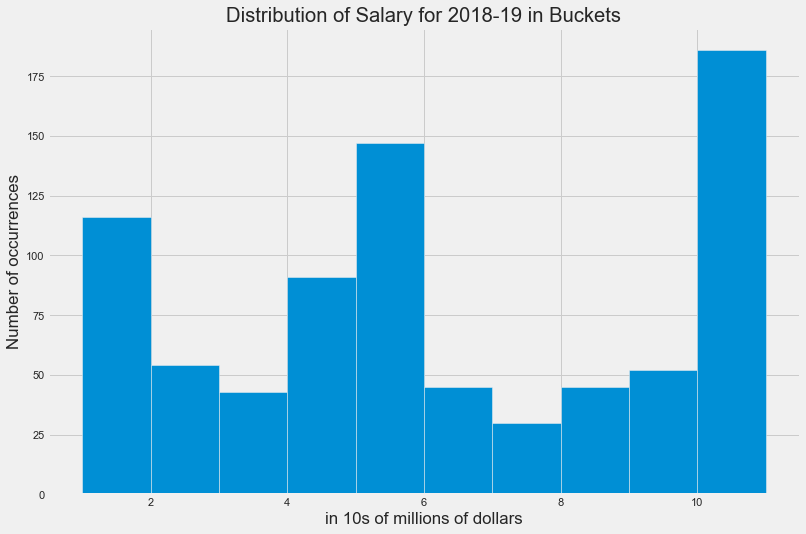

In [513]:
bucket = df_new['bucket'] # hist plot shows very uneven distribution for the salaries.

_ = plt.hist(bucket)
_ = plt.xlabel('in 10s of millions of dollars')
_ = plt.ylabel('Number of Occurrences')
_ = plt.title('Distribution of Salary for 2018-19 in Buckets')

plt.show()

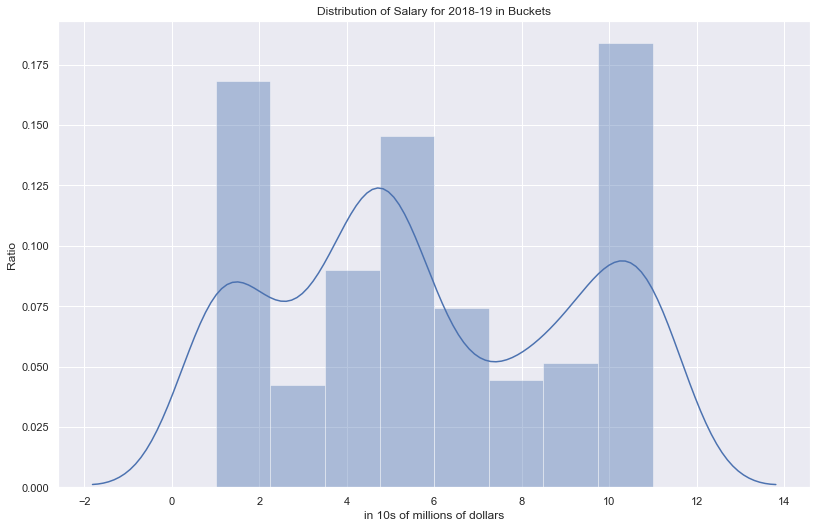

In [514]:
x = df_new['bucket']

sns.set(); np.random.seed(0)
ax = sns.distplot(x)
_ = plt.xlabel('in 10s of millions of dollars')
_ = plt.ylabel('Ratio')
_ = plt.title('Distribution of Salary for 2018-19 in Buckets')

In [515]:
# first model, all features

m_new = ols('bucket ~ Age + G + MP + PER + TSr + threePAr + FTr + ORBr + DRBr + TRBr + ASTr + STLr + BLKr + TOVr + USGr + OWS + DWS + WS + OBPM + DBPM + BPM + VORP', df_new).fit()
m_new.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bucket   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     27.20
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           1.58e-81
Time:                        10:23:28   Log-Likelihood:                -1903.7
No. Observations:                 809   AIC:                             3853.
Df Residuals:                     786   BIC:                             3961.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0245      1.465     -0.017      0.987      -2.899       2.850
Age            0.2443      0.023     10.733      0.000       0.200       0.289
G             -0.0400      0.010     -4.050      0.000      -0.059      -0.021
MP             0.0026      0.000      6.507      0.000       0.002       0.003
PER           -0.1240      0.066     -1.884      0.060      -0.253       0.005
TSr           -2.2769      1.434     -1.588      0.113      -5.092       0.538
threePAr      -1.5453      0.842     -1.836      0.067      -3.197       0.107
FTr            0.3859      0.524      0.737      0.461      -0.642       1.414
ORBr          -0.5149      0.293     -1.758      0.079      -1.090       0.060
DRBr          -0.4109      0.282     -1.457      0.146      -0.965       0.143
TRBr           0.8949      0.573      1.561      0.119      -0.231       2.021
ASTr          -0.0565      0.015     -3.776      0.000      -0.086      -0.027
STLr          -0.1632      0.136     -1.196      0.232      -0.431       0.105
BLKr           0.1098      0.109      1.008      0.314      -0.104       0.324
TOVr           0.0361      0.022      1.664      0.097      -0.006       0.079
USGr           0.1245      0.025      4.922      0.000       0.075       0.174
OWS           -2.3561      1.936     -1.217      0.224      -6.157       1.445
DWS           -1.7674      1.936     -0.913      0.362      -5.568       2.033
WS             2.3179      1.937      1.197      0.232      -1.484       6.120
OBPM           4.1805      1.786      2.340      0.020       0.674       7.687
DBPM           3.9369      1.794      2.194      0.029       0.415       7.459
BPM           -3.8857      1.788     -2.173      0.030      -7.395      -0.376
VORP          -0.1713      0.263     -0.650      0.516      -0.688       0.346
==============================================================================
Omnibus:                        9.814   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.400
Skew:                           0.034   Prob(JB):                       0.0408
Kurtosis:                       2.570   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [516]:
# kept those features that had low p-values

m_new1 = ols('bucket ~ Age + G + MP + ASTr + USGr + OBPM + DBPM + BPM', df_new).fit()
m_new1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bucket   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     70.52
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           1.51e-87
Time:                        10:23:28   Log-Likelihood:                -1916.8
No. Observations:                 809   AIC:                             3852.
Df Residuals:                     800   BIC:                             3894.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4515      0.712     -4.848      0.000      -4.849      -2.054
Age            0.2568      0.022     11.593      0.000       0.213       0.300
G             -0.0348      0.009     -3.966      0.000      -0.052      -0.018
MP             0.0030      0.000     10.036      0.000       0.002       0.004
ASTr          -0.0363      0.012     -3.011      0.003      -0.060      -0.013
USGr           0.0991      0.018      5.412      0.000       0.063       0.135
OBPM           3.9635      1.763      2.248      0.025       0.503       7.424
DBPM           4.1340      1.762      2.346      0.019       0.675       7.593
BPM           -3.9727      1.763     -2.254      0.024      -7.433      -0.513
==============================================================================
Omnibus:                       19.284   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.300
Skew:                           0.026   Prob(JB):                      0.00580
Kurtosis:                       2.450   Cond. No.                     3.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [517]:
# Create arrays for features and target variable
y = df_new['bucket'].values
X = df_new.drop('bucket', axis = 1)

In [518]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create the regressor: reg
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.3395409206328137
Root Mean Squared Error: 2.6469348480304733


### Analysis:

##### What we can see here is that the prediction model to estimate what bucket a player's salary would fall into is less accurate than any of our previous attempts. Our new linear regression model 'm_new1' resulted with an R2 value of .414 which is lower than our best model from before of .465. This shows just how difficult it can be to estimate even a range of the salary based on just on court production. 

##### Something to take into consideration would be that there is a lot of off-court value in a player that is built into a player's contract and that maybe their on court performance is just a fraction of their salary. Potentially even just half? Based on all of the models we created and tests, we can say with statistical confidence that at best, we only accounted for about of the salary through on court statistics. 

##### To elaborate further, a player will contribute to an organization through increased ticket sales, merchandise, apparel, and even brand or team awareness. These other factors are clearly built into a player's contract and it's possible that only a portion of their salary is actually based upon their on court performance.

### Final Thought:

##### What if we split the data into an equal distribution into the buckets for salary range? Can we create a more accurate model of prediction?

In [519]:
df.head()

,Age,G,MP,PER,TSr,threePAr,FTr,ORBr,DRBr,TRBr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year0,predicted_salary,bucket
0,25.0,31.0,588.0,6.3,0.507,0.809,0.083,0.9,7.8,4.2,...,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2,5455236.0,7.778709e+05,8
1,28.0,10.0,123.0,2.9,0.379,0.833,0.556,2.7,20.2,11.3,...,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1,213949.0,4.600043e+06,1
2,22.0,32.0,393.0,7.9,0.479,0.689,0.078,2.9,11.5,7.1,...,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2,236854.0,-6.846061e+05,1
3,25.0,77.0,2593.0,18.9,0.596,0.003,0.360,14.6,14.8,14.7,...,4.0,9.1,0.168,0.8,2.2,3.0,3.3,24157304.0,1.701638e+07,11
4,21.0,79.0,1841.0,17.8,0.623,0.028,0.469,9.3,23.7,16.5,...,3.2,6.6,0.171,-0.5,3.6,3.0,2.4,2955840.0,9.811326e+06,5


In [520]:
pd.qcut(df['year0'], 10).head()

0      (3628704.4, 7000000.0]
1        (198580.0, 917272.0]
2        (198580.0, 917272.0]
3    (17913059.0, 37457154.0]
4      (2667600.0, 3628704.4]
Name: year0, dtype: category
Categories (10, interval[float64]): [(34182.999, 198580.0] < (198580.0, 917272.0] < (917272.0, 1553773.4] < (1553773.4, 2215824.0] ... (3628704.4, 7000000.0] < (7000000.0, 11898214.8] < (11898214.8, 17913059.0] < (17913059.0, 37457154.0]]

In [532]:
# We can see the ranges for the buckets above. For analysis purposes, lets label these buckets.

pd.qcut(df['year0'], 10, labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

0       7
1       2
2       2
3      10
4       6
5       5
6       5
7      10
8       5
9       4
10      4
11      5
12      7
13      5
14      8
15     10
16     10
17     10
18      3
19     10
20      5
21     10
22      5
23      4
24      3
25      9
26      9
27      9
28      8
29      8
       ..
779    10
780     5
781     5
782     5
783     2
784     8
785     9
786     4
787     1
788     1
789     5
790     6
791     3
792     3
793     3
794     5
795     5
796     5
797     5
798     2
799     9
800     7
801     9
802     1
803     1
804     1
805     4
806     3
807     3
808     3
Name: year0, Length: 809, dtype: category
Categories (10, object): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [528]:
# These new values will be stored as objects, we need them to be saved as integers
df['bucket_even'] = pd.qcut(df['year0'], 10, labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [537]:
df['bucket_even'] = df['bucket_even'].astype(str).astype(int)

In [538]:
df.head()

,Age,G,MP,PER,TSr,threePAr,FTr,ORBr,DRBr,TRBr,...,WS,WS/48,OBPM,DBPM,BPM,VORP,year0,predicted_salary,bucket,bucket_even
0,25.0,31.0,588.0,6.3,0.507,0.809,0.083,0.9,7.8,4.2,...,0.7,0.054,-2.5,-1.0,-3.4,-0.2,5455236.0,7.778709e+05,8,7
1,28.0,10.0,123.0,2.9,0.379,0.833,0.556,2.7,20.2,11.3,...,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1,213949.0,4.600043e+06,1,2
2,22.0,32.0,393.0,7.9,0.479,0.689,0.078,2.9,11.5,7.1,...,0.1,0.014,-2.8,-1.5,-4.3,-0.2,236854.0,-6.846061e+05,1,2
3,25.0,77.0,2593.0,18.9,0.596,0.003,0.360,14.6,14.8,14.7,...,9.1,0.168,0.8,2.2,3.0,3.3,24157304.0,1.701638e+07,11,10
4,21.0,79.0,1841.0,17.8,0.623,0.028,0.469,9.3,23.7,16.5,...,6.6,0.171,-0.5,3.6,3.0,2.4,2955840.0,9.811326e+06,5,6


In [539]:
df['bucket_even'].value_counts()

5     111
7      86
2      82
1      82
10     81
9      81
4      81
3      79
8      76
6      50
Name: bucket_even, dtype: int64

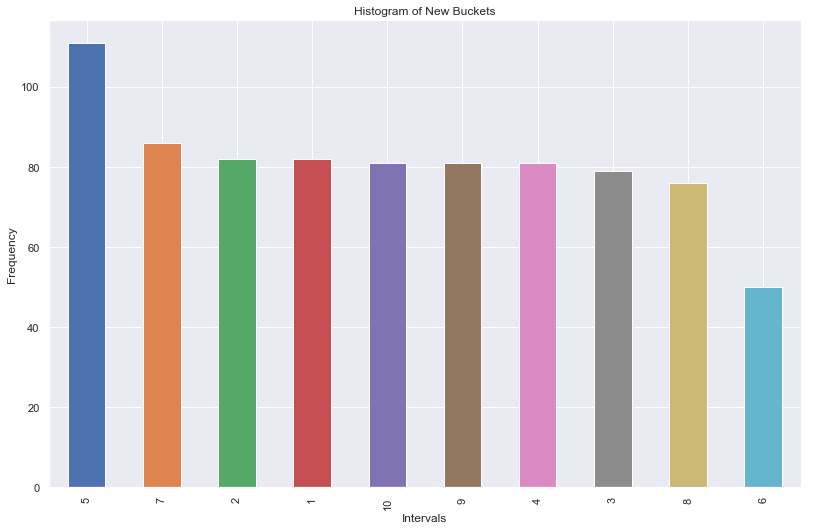

In [540]:
_ = plt.title('Histogram of New Buckets')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Intervals')
ax = df['bucket_even'].value_counts().plot.bar()

In [541]:
# Let's create our model
# First lets remove the actual salary value itself, 'year0', as it will impact the results. Also removing 'predicted_salary' and 'bucket'

df1 = df.drop(['year0', 'predicted_salary', 'bucket'], axis = 1)

df1.head() # can see columns are now gone.

,Age,G,MP,PER,TSr,threePAr,FTr,ORBr,DRBr,TRBr,...,USGr,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,bucket_even
0,25.0,31.0,588.0,6.3,0.507,0.809,0.083,0.9,7.8,4.2,...,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2,7
1,28.0,10.0,123.0,2.9,0.379,0.833,0.556,2.7,20.2,11.3,...,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1,2
2,22.0,32.0,393.0,7.9,0.479,0.689,0.078,2.9,11.5,7.1,...,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2,2
3,25.0,77.0,2593.0,18.9,0.596,0.003,0.360,14.6,14.8,14.7,...,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3,10
4,21.0,79.0,1841.0,17.8,0.623,0.028,0.469,9.3,23.7,16.5,...,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4,6


In [542]:
# Create arrays for features and target variable
y = df1['bucket_even'].values
X = df2.values

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

In [543]:
# first model, all features

m1 = ols('bucket_even ~ Age + G + MP + PER + TSr + threePAr + FTr + ORBr + DRBr + TRBr + ASTr + STLr + BLKr + TOVr + USGr + OWS + DWS + WS + OBPM + DBPM + BPM + VORP', df1).fit()
m1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bucket_even   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     26.07
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           1.54e-78
Time:                        10:37:03   Log-Likelihood:                -1780.2
No. Observations:                 809   AIC:                             3606.
Df Residuals:                     786   BIC:                             3714.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8067      1.257      0.642      0.521      -1.661       3.275
Age            0.1994      0.020     10.203      0.000       0.161       0.238
G             -0.0325      0.008     -3.839      0.000      -0.049      -0.016
MP             0.0023      0.000      6.560      0.000       0.002       0.003
PER           -0.1102      0.057     -1.950      0.052      -0.221       0.001
TSr           -2.2740      1.231     -1.847      0.065      -4.690       0.142
threePAr      -1.2658      0.723     -1.752      0.080      -2.684       0.152
FTr            0.2373      0.450      0.528      0.598      -0.645       1.120
ORBr          -0.3525      0.251     -1.402      0.161      -0.846       0.141
DRBr          -0.2612      0.242     -1.079      0.281      -0.736       0.214
TRBr           0.5893      0.492      1.197      0.232      -0.377       1.556
ASTr          -0.0434      0.013     -3.381      0.001      -0.069      -0.018
STLr          -0.1065      0.117     -0.909      0.363      -0.336       0.123
BLKr           0.1171      0.094      1.252      0.211      -0.066       0.301
TOVr           0.0319      0.019      1.710      0.088      -0.005       0.069
USGr           0.0995      0.022      4.584      0.000       0.057       0.142
OWS           -1.4149      1.662     -0.851      0.395      -4.678       1.848
DWS           -0.9451      1.662     -0.569      0.570      -4.208       2.318
WS             1.3518      1.663      0.813      0.416      -1.912       4.616
OBPM           3.8020      1.533      2.480      0.013       0.792       6.812
DBPM           3.5636      1.540      2.314      0.021       0.540       6.587
BPM           -3.5449      1.535     -2.310      0.021      -6.558      -0.532
VORP          -0.0750      0.226     -0.332      0.740      -0.519       0.369
==============================================================================
Omnibus:                       15.802   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.950
Skew:                          -0.018   Prob(JB):                       0.0114
Kurtosis:                       2.486   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [546]:
m2 = ols('bucket_even ~ Age + G + MP + ASTr + USGr + OBPM + DBPM + BPM', df1).fit()
m2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bucket_even   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     68.09
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           4.43e-85
Time:                        10:39:30   Log-Likelihood:                -1791.8
No. Observations:                 809   AIC:                             3602.
Df Residuals:                     800   BIC:                             3644.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2590      0.610     -3.703      0.000      -3.456      -1.062
Age            0.2093      0.019     11.029      0.000       0.172       0.247
G             -0.0293      0.008     -3.903      0.000      -0.044      -0.015
MP             0.0026      0.000     10.081      0.000       0.002       0.003
ASTr          -0.0250      0.010     -2.427      0.015      -0.045      -0.005
USGr           0.0793      0.016      5.058      0.000       0.049       0.110
OBPM           3.5346      1.510      2.340      0.020       0.570       6.499
DBPM           3.6818      1.510      2.438      0.015       0.718       6.646
BPM           -3.5543      1.510     -2.353      0.019      -6.519      -0.590
==============================================================================
Omnibus:                       26.372   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.722
Skew:                          -0.033   Prob(JB):                      0.00173
Kurtosis:                       2.389   Cond. No.                     3.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results:

##### Once again a less accurate model for predicting which bucket a player's salary would fall into. This model was actually less accurate than the previous method of binning that we had completed just before. 

##### The best model for prediction that we've had has been m_1 from above with an R2 of .465. 

#### This analysis was able to provide a few key takeaways:
##### Predicting a player's salary off just on court performance is not very accurate as there are clearly many factors involved in a player's salary besides their production on the court. The linear regression approach we took was more accurate when trying to predict the actual salary rather than both a fixed range and a computed range. 
